In [4]:
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd

import seaborn as sns

from data.eda import plot_cat_count
from data.preprocess_data import normalize_text

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, roc_auc_score

import xgboost as xgb

In [5]:
# read the external data
df_tweet = pd.read_csv("../data/external/tweet_emotions.csv")
df_tweet.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [6]:
df_tweet.drop('tweet_id', axis=1, inplace=True)
df_tweet.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [7]:
# get the unique list of all sentiment values
df_tweet['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [8]:
df_tweet['sentiment'].isna().sum()

0

There are no null values in sentiment column

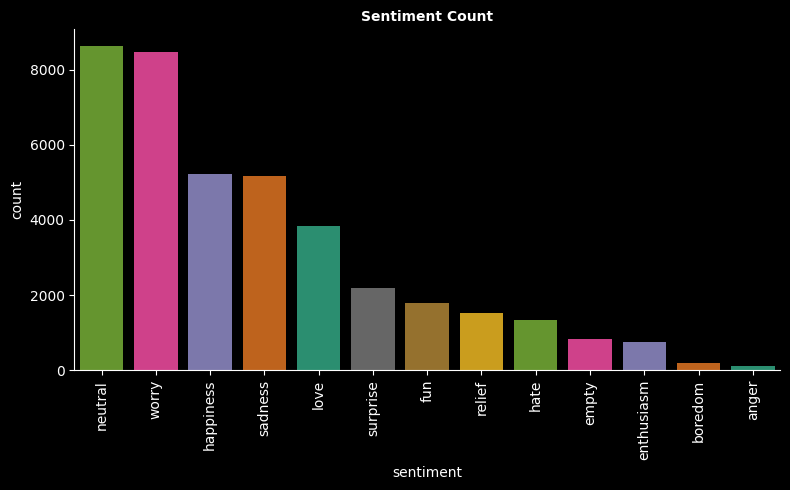

In [9]:
plot_cat_count(df_tweet['sentiment'].value_counts(), x_label='sentiment', y_label='count', title='Sentiment Count', index_on_x=1, xticklbl_rotate=90)

In [10]:
df_tweet = df_tweet[df_tweet['sentiment'].isin(['happiness', 'sadness'])]

In [11]:
# encode sentiment values
codes, uniques = pd.factorize(df_tweet['sentiment'])
df_tweet['sentiment'] = pd.Categorical(codes)
df_tweet.head()

,sentiment,content
1,0,Layin n bed with a headache ughhhh...waitin o...
2,0,Funeral ceremony...gloomy friday...
6,0,"I should be sleep, but im not! thinking about ..."
8,0,@charviray Charlene my love. I miss you
9,0,@kelcouch I'm sorry at least it's Friday?


In [12]:
df_tweet['sentiment'].value_counts()

1    5209
0    5165
Name: sentiment, dtype: int64

In [13]:
df_tweet = normalize_text(df_tweet)

In [14]:
df_tweet.head()

,sentiment,content
1,0,layin n bed headache ughhhh waitin call
2,0,funeral ceremony gloomy friday
6,0,sleep im not thinking old friend want he s mar...
8,0,charviray charlene love miss
9,0,kelcouch i m sorry least friday


In [15]:
# split data
X_train, X_test, y_train, y_test = train_test_split(df_tweet['content'].values, df_tweet['sentiment'].values, test_size=0.2, random_state=42)

In [16]:
# Apply Bag of Words 
vectorizer = CountVectorizer()

# Fit the vectorizer to training data nd transform
X_train_bow = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_bow = vectorizer.transform(X_test)

In [17]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_bow, y_train)

# model prediction
y_pred = model.predict(X_test_bow)

# model evaluation
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", cr)


Accuracy: 0.776867469879518
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79      1060
           1       0.80      0.73      0.76      1015

    accuracy                           0.78      2075
   macro avg       0.78      0.78      0.78      2075
weighted avg       0.78      0.78      0.78      2075



In [18]:
y_pred_proba = model.predict_proba(X_test_bow)[:,1]

In [19]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)


print('Precision:', precision)
print('Recall:', recall)
print('AUC score:', auc)

Precision: 0.7980561555075594
Recall: 0.7280788177339902
AUC score: 0.8599126312854354
